### Modelo Fitzhugh-nagumo


### En la siguiente descripción realiza el comportomiento oscilatorio del modelo neuronal F-N, de tercer orden. Que a pequeños estímulos de energía la carga del sistema produce un comportamiento aleatorio reflejado en el retrato de fase 

### Describe la figura 7.5.1 de "NONLINEAR DYNAMICS AND CHAOS" y resultados de la FAMAF



In [8]:
#### LIBRERÍA A CARGO DEL LECTOR #### ()

### Descripciones del sistema ODE 

In [28]:
def H_u(u, v):
    thau = 8
    return thau * (-v + u - pow(u,3)/3 + E)

def H_v(u, v):
    theta = 0.75
    beta = 0.9
    return u - beta * v + theta

def F_H(state, t):
    u, v = state
    deltau = H_u(u,v)
    deltav = H_v(u,v)
    return deltau, deltav

E = 0.45 #Corriente inicial del intercambio eléctrico nano amperio 
# Donde 'E' es la carga inicial del sistema del diferencial de potencial en los axones 

### Inicializado el sistema se produce la dinámica de arranque 

In [29]:
# Condición inicial del sistema dinámico 
u_0 = 0.2
v_0 = 0.3

t = np.arange(0.0, 20, 0.01)

y_0 = [u_0, v_0]  #Las condiciones iniciales 
y = integrate.odeint(F_H, y_0, t)
u_vec = y[:,0] 
v_vec = y[:,1]


### Diferencial del potencial de la membrana entre el ciclo I ---> u ;     E---->v

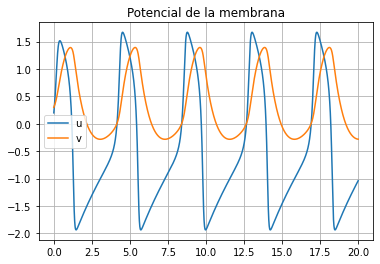

In [42]:

plt.figure()
plt.plot(t, u_vec, label="u")
plt.plot(t, v_vec, label="v")
plt.title("Potencial de la membrana")
plt.grid()
plt.legend()



### Dinámica Neuronal

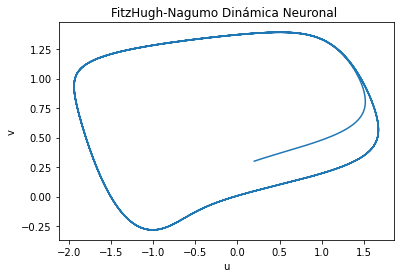

In [37]:
plt.figure()
plt.plot(u_vec, v_vec)
plt.xlabel("u")
plt.ylabel("v")
plt.title("FitzHugh-Nagumo Dinámica Neuronal ")
P = 0.2 # relleno


### Nulclinas, Nullcline 

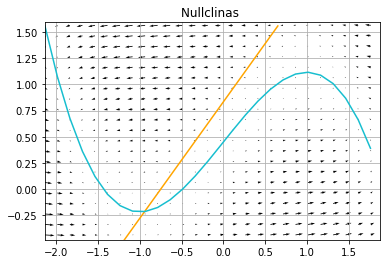

In [38]:
umax, umin = u_vec.max() + P,  u_vec.min() - P
vmax, vmin = v_vec.max() + P,  v_vec.min() - P
U, V = np.meshgrid(np.arange(umin, umax, 0.15), np.arange(umin, vmax, 0.1))
dU = H_u(U, V)
dV = H_v(U, V)
plt.quiver(U, V, dU, dV)
plt.contour(U, V, dV, levels=[0], colors="orange")
plt.contour(U, V, dU, levels=[0], colors="C9")
plt.xlim([umin, umax])
plt.ylim([vmin, vmax])
plt.title("Nullclinas ")
plt.grid()
plt.show()